In [1]:
import _pickle as pickle
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import os
import seaborn as sns
import pandas as pd
import timeit

from itertools import product

from utils import set_size, pgf_with_latex

In [2]:
plt.style.use("seaborn-v0_8-colorblind")
# But with fonts from the document body
plt.rcParams.update(pgf_with_latex)

# Using the set_size function as defined earlier
doc_width_pt = 452.9679

In [3]:
tats_keys = [
    "accuracy",
    "p_iwl",
    "context contains query class",
    "loss",
    "ic_pred",
    "iw_pred",
]

In [4]:
repo_path = "/Users/chanb/research/ualberta/icl/simple_icl"
results_dir = "/Users/chanb/research/ualberta/icl/cc_results/paper_experiments/evaluation_results"
results_dir = "/Users/chanb/research/ualberta/icl/cc_results/paper_experiments/evaluation_results-e2e"

In [5]:
variant_name = "synthetic-transformer-num_low_freq"
variant_name = "synthetic-simple_icl-num_low_freq"
# variant_name = "synthetic-e2e_alpha-num_low_freq"

checkpoint_steps = 500
chance_error = 9/10

stats_file = os.path.join(repo_path, "plot_utils/plots/agg_stats", "{}.feather".format(variant_name))
stats = pd.read_feather(stats_file)

os.makedirs(
    os.path.join(repo_path, "plot_utils/plots/acc-plots", variant_name),
    exist_ok=True
)

results_dir = os.path.join(results_dir, variant_name)
eval_namess = [
    [
        "pretraining"
    ],
    [
        "eval-relevant_context-none",
        "eval-irrelevant_context-none",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0",
        "pretrain-sample_low_prob_class_only-start_pos_0",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_0-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1",
        "pretrain-sample_low_prob_class_only-start_pos_1",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_1-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7",
        "pretrain-sample_low_prob_class_only-start_pos_7",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_7-flip_label",
    ],
]
plot_names = [
    "pretraining",
    "context-default",
    "iwl",
    "iwl-flip_label",
    "icl-last_context",
    "icl-last_context-flip_label",
    "icl-except_first_context",
    "icl-except_first_context-flip_label",
]
plot_titles = [
    "Pretraining",
    "Context Default"
    "In-weight Evaluation",
    "In-weight Evaluation with Flipped Label",
    "In-context Evaluation with Last Context",
    "In-context Evaluation with Last Context + Flipped Label",
    "In-context Evaluation with Contexts but First",
    "In-context Evaluation with Contexts but First + Flipped Label",
]

map_stats_key = {
    "p_iwl": "$\\alpha(x)$",
    "accuracy": "Accuracy",
    "context contains query class": "Context Contains Query Class",
    "loss": "Loss",
    "ic_pred": "In-context Accuracy",
    "iw_pred": "In-weight Accuracy"
}

map_variant = {
    "ground_truth_prob": "$P(g(x) = c)$",
    "high_prob": "$P(high\_freq.)$"
}

In [6]:
variants = stats["variant"].unique()

# Transformer

In [7]:
stats

,model_type,dirname,variant,seed,eval_name,stats_key,stats,run_name,dataset_size,p_relevant_context,num_low_prob_classes
0,transformer,synthetic-alpha-num_low_freq,dataset_size_65536-p_relevant_context_0.9-num_...,seed_3,eval-default-none-flip_label,accuracy,"[0.8960000000000001, 0.152, 0.16, 0.153, 0.16,...",dataset_size_65536-p_relevant_context_0.9-num_...,65536,0.9,45
1,transformer,synthetic-alpha-num_low_freq,dataset_size_65536-p_relevant_context_0.9-num_...,seed_3,eval-default-none-flip_label,p_iwl,"[0.5174729824066162, 0.8702601194381714, 0.872...",dataset_size_65536-p_relevant_context_0.9-num_...,65536,0.9,45
2,transformer,synthetic-alpha-num_low_freq,dataset_size_65536-p_relevant_context_0.9-num_...,seed_3,eval-default-none-flip_label,context contains query class,"[0.896, 0.896, 0.896, 0.896, 0.896, 0.896, 0.8...",dataset_size_65536-p_relevant_context_0.9-num_...,65536,0.9,45
3,transformer,synthetic-alpha-num_low_freq,dataset_size_65536-p_relevant_context_0.9-num_...,seed_3,eval-default-none-flip_label,ic_pred,"[0.8960000276565552, 0.8960000276565552, 0.896...",dataset_size_65536-p_relevant_context_0.9-num_...,65536,0.9,45
4,transformer,synthetic-alpha-num_low_freq,dataset_size_65536-p_relevant_context_0.9-num_...,seed_3,eval-default-none-flip_label,iw_pred,"[0.01900000125169754, 0.04100000113248825, 0.0...",dataset_size_65536-p_relevant_context_0.9-num_...,65536,0.9,45
...,...,...,...,...,...,...,...,...,...,...,...
31915,transformer,synthetic-iw-num_low_freq,dataset_size_1024-p_relevant_context_0.9-num_l...,seed_3,eval-irrelevant_context-low_prob,context contains query class,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dataset_size_1024-p_relevant_context_0.9-num_l...,1024,0.9,45
31916,transformer,synthetic-iw-num_low_freq,dataset_size_1024-p_relevant_context_0.9-num_l...,seed_3,eval-irrelevant_context-low_prob,loss,"[3.9205739498138428, 11.639440536499023, 14.14...",dataset_size_1024-p_relevant_context_0.9-num_l...,1024,0.9,45
31917,transformer,synthetic-iw-num_low_freq,dataset_size_1024-p_relevant_context_0.9-num_l...,seed_3,pretraining,accuracy,"[0.0097, 0.8773, 0.8782, 0.8782, 0.8782, 0.878...",dataset_size_1024-p_relevant_context_0.9-num_l...,1024,0.9,45
31918,transformer,synthetic-iw-num_low_freq,dataset_size_1024-p_relevant_context_0.9-num_l...,seed_3,pretraining,context contains query class,"[0.9048, 0.9048, 0.9048, 0.9048, 0.9048, 0.904...",dataset_size_1024-p_relevant_context_0.9-num_l...,1024,0.9,45


In [8]:
dataset_sizes = sorted([int(dataset_size) for dataset_size in stats["dataset_size"].unique()])
num_low_prob_classess = sorted([int(num_low_prob_classes) for num_low_prob_classes in stats["num_low_prob_classes"].unique()])
model_types = ["iw", "ic", "alpha"]
# model_types = ["alpha"]

In [9]:
dataset_sizes

[1024, 4096, 16384, 65536, 262144, 1048576]

In [10]:
best_idxes = dict()

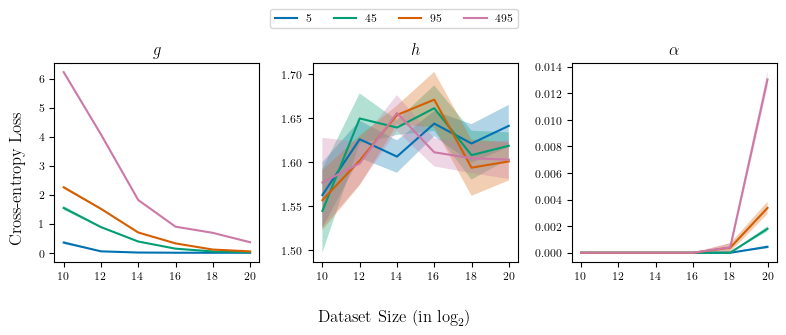

In [11]:
map_label = {
    "iw": "$g$",
    "ic": "$h$",
    "alpha": "$\\alpha$",
}

p_relevant_context = 0.9

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ax_i, model_type in enumerate(model_types):
    ax = axes[ax_i]
    for variant_i, num_low_prob_classes in enumerate(num_low_prob_classess):
        losses_mean = []
        losses_std = []

        for dataset_size in dataset_sizes:
            data = (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                & (stats["stats_key"] == "loss")
                & (stats["eval_name"] == "pretraining")
                & (stats["dataset_size"] == f"{dataset_size}")
                & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
            ]["stats"].to_list()))
            best_idx = data.shape[1] - np.argmin(data[:, ::-1], axis=-1) - 1

            best_idxes[(
                model_type, p_relevant_context, num_low_prob_classes, dataset_size
            )] = best_idx

            sample = data[np.arange(5), best_idx]
            curr_mean = np.mean(sample)
            curr_std = np.std(sample)

            losses_mean.append(curr_mean)
            losses_std.append(curr_std)

        losses_mean = np.array(losses_mean)
        losses_std = np.array(losses_std) / np.sqrt(5)

        ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=num_low_prob_classes if ax_i == 0 else "")
        ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

    ax.set_title(map_label[model_type])
    # ax.set_ylim(0.0, 0.009)

fig.supylabel("Cross-entropy Loss")
fig.supxlabel("Dataset Size (in $\\log_2$)")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=5,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
fig.tight_layout()
plt.show()

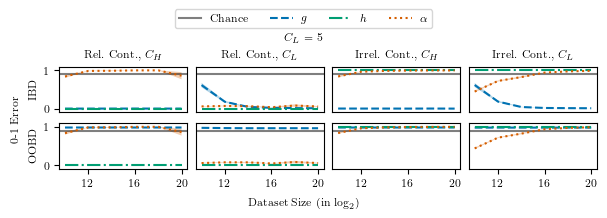

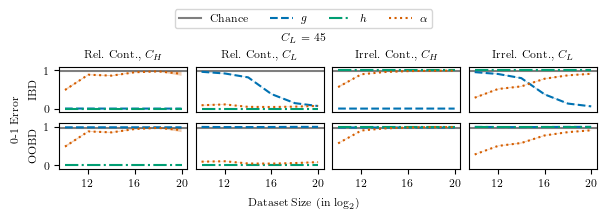

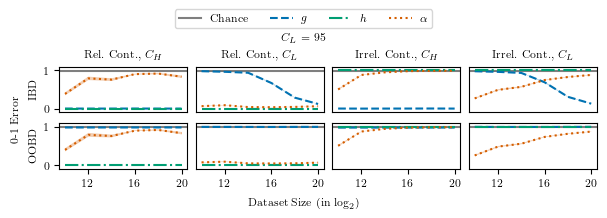

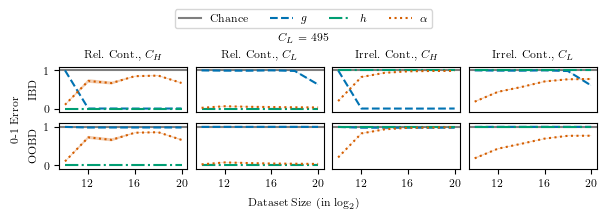

In [15]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob": "Irrel. Cont., $C_L$",
    "eval-relevant_context-high_prob-flip_label": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob-flip_label": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Cont., $C_L$",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]

map_ls = {
    "iw": "--",
    "ic": "-.",
    "alpha": ":",
}
if variant_name.startswith("synthetic"):
    base = 4.0
else:
    base = 1.0


num_rows = 2
num_cols = 4
checkpoint_i = -1
for num_low_prob_classes in num_low_prob_classess:
    # fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    fig, axes = plt.subplots(
        num_rows,
        num_cols,
        figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
        layout="constrained",
    )
    for row_i, eval_names in enumerate(eval_namess):
        for eval_i, eval_name in enumerate(eval_names):
            ax = axes[row_i, eval_i]
            # ax = axes[eval_i]
            ax.axhline(1 - 1/(num_low_prob_classes + 5), label="Chance" if eval_i == 0 and row_i == 0 else "", c="black", linestyle="-", alpha=0.5)
            for model_type in model_types:
                losses_mean = []
                losses_std = []

                for dataset_size in dataset_sizes:
                    if model_type == "alpha":
                        data = (np.array(stats[
                            (stats["p_relevant_context"] == f"{p_relevant_context}")
                            & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                            & (stats["stats_key"] == "p_iwl")
                            & (stats["eval_name"] == eval_name)
                            & (stats["dataset_size"] == f"{dataset_size}")
                            & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                        ]["stats"].to_list()))
                    else:
                        data = 1 - (np.array(stats[
                            (stats["p_relevant_context"] == f"{p_relevant_context}")
                            & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                            & (stats["stats_key"] == "accuracy")
                            & (stats["eval_name"] == eval_name)
                            & (stats["dataset_size"] == f"{dataset_size}")
                            & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                        ]["stats"].to_list()))
                    best_idx = best_idxes[(
                        model_type, p_relevant_context, num_low_prob_classes, dataset_size
                    )]
                    sample = data[np.arange(5), best_idx]
                    curr_mean = np.mean(sample)
                    curr_std = np.std(sample)
                    
                    losses_mean.append(curr_mean)
                    losses_std.append(curr_std)

                losses_mean = np.array(losses_mean)
                losses_std = np.array(losses_std) / np.sqrt(5)

                ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[model_type] if eval_i == 0 and row_i == 0 else "", linestyle=map_ls[model_type])
                ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)
            loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
            ax.xaxis.set_major_locator(loc)

            ax.set_ylim(-0.1, 1.1)

            if eval_i == 0:
                ax.set_ylabel("IBD" if row_i == 0 else "OOBD", fontsize="8",)

            if eval_i > 0:
                ax.set_yticks([])

            if row_i == 0:
                ax.set_title(map_eval[eval_name], fontsize="8",)
                ax.set_xticks([])

    fig.suptitle("$C_L$ = {}".format(num_low_prob_classes), fontsize="8",)
    fig.supylabel("0-1 Error", fontsize="8",)
    fig.supxlabel("Dataset Size (in $\\log_2$)", fontsize="8",)
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=4,
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )
    # fig.tight_layout()
    # plt.show()
    plt.savefig("{}-num_low_freq-num_low_prob_classes_{}-p_iwl.pdf".format(variant_name, num_low_prob_classes), dpi=600, format="pdf", bbox_inches="tight")


In [ ]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
}

eval_names = [
    "eval-relevant_context-none",
    "eval-irrelevant_context-none",
    "eval-relevant_context-none-flip_label",
    "eval-irrelevant_context-none-flip_label",
]

checkpoint_i = -1
for num_low_prob_classes in num_low_prob_classess:
    fig, axes = plt.subplots(1, 4, figsize=(10, 3))
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[eval_i]
        for model_type in model_types:
            losses_mean = []
            losses_std = []

            for dataset_size in dataset_sizes:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                    & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                ]["stats"].to_list()))
                losses_mean.append(np.mean(data, axis=0)[checkpoint_i])
                losses_std.append(np.std(data, axis=0)[checkpoint_i])

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(5)

            ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[model_type] if eval_i == 0 else "")
            ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.set_title(map_eval[eval_name])
        ax.axhline(1 - 1/(num_low_prob_classes + 5), label="Chance" if eval_i == 0 else "", c="red", linestyle="--")
        ax.set_ylim(-0.1, 1.1)

    fig.suptitle("$C_L$: {}".format(num_low_prob_classes))
    fig.supylabel("0-1 Error")
    fig.supxlabel("Dataset Size (in $\\log_2$)")
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=4,
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )
    fig.tight_layout()
    plt.show()

In [ ]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "eval-default-none": "In-base Dist.",
    "eval-default-none-flip_label": "Out-of-base Dist.",
}

eval_names = [
    "eval-default-none",
    "eval-default-none-flip_label",
]

num_rows = 2
num_cols = len(num_low_prob_classess)
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=False),
    layout="constrained",
)
for col_i, num_low_prob_classes in enumerate(num_low_prob_classess):
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[eval_i, col_i]
        for model_type in model_types:
            losses_mean = []
            losses_std = []

            for dataset_size in dataset_sizes:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                        & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                ]["stats"].to_list()))
                best_idx = best_idxes[(
                    model_type, p_relevant_context, num_low_prob_classes, dataset_size
                )]
                sample = data[np.arange(5), best_idx]
                curr_mean = np.mean(sample)
                curr_std = np.std(sample)
                
                losses_mean.append(curr_mean)
                losses_std.append(curr_std)

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(5)

            ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[model_type] if eval_i == 0 and col_i == 0 else "")
            ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.axhline(1 - 1/(num_low_prob_classes + 5), label="Chance" if eval_i == 0 and col_i == 0 else "", c="red", linestyle="--")
        ax.set_ylim(-0.1, 1.1)

        if col_i == 0:
            ax.set_ylabel(map_eval[eval_name], fontsize="8")
    
    axes[0, col_i].set_title(f"$C_L = {num_low_prob_classes}$", fontsize="8")

# fig.suptitle("Input Noise")
fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("Dataset Size (in $\\log_2$)", fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
plt.savefig("num_low_prob_classes.pdf", dpi=600, format="pdf", bbox_inches="tight")

1048576


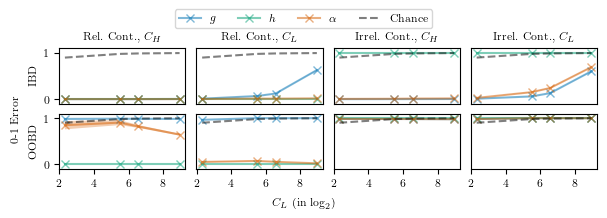

In [13]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob": "Irrel. Cont., $C_L$",
    "eval-relevant_context-high_prob-flip_label": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob-flip_label": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Cont., $C_L$",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "eval-default-none": "IBD",
    "eval-default-none-flip_label": "OOBD",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    # figsize=(10, 5),
    layout="constrained",
)

dataset_size = dataset_sizes[-1]
print(dataset_size)
for row_i, eval_names in enumerate(eval_namess):
    for col_i, eval_name in enumerate(eval_names):

        ax = axes[row_i, col_i]

        for model_type in model_types:
            losses_mean = []
            losses_std = []
            for num_low_prob_classes in num_low_prob_classess:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                    & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                ]["stats"].to_list()))
                best_idx = best_idxes[(
                    model_type, p_relevant_context, num_low_prob_classes, dataset_size
                )]
                sample = data[np.arange(5), best_idx]
                curr_mean = np.mean(sample)
                curr_std = np.std(sample)
                
                losses_mean.append(curr_mean)
                losses_std.append(curr_std)

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(5)

            ax.plot(np.log2(num_low_prob_classess), losses_mean, label=map_label[model_type] if row_i == 0 and col_i == 0 else "", marker="x", alpha=1.0 if model_type == "transformer" else 0.5)
            ax.fill_between(np.log2(num_low_prob_classess), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)


        ax.plot(
            np.log2(num_low_prob_classess),
            1 - 1/(np.array(num_low_prob_classess) + 5),
            label="Chance" if row_i == 0 and col_i == 0 else "", linestyle="--", c="black",
            alpha=0.5)
        ax.set_ylim(-0.1, 1.1)
        loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)

        if col_i == 0:
            ax.set_ylabel("IBD" if row_i == 0 else "OOBD", fontsize="8")
    
        if col_i > 0:
            ax.set_yticks([])

        if row_i == 0:
            ax.set_xticks([])
            ax.set_title(map_eval[eval_name], fontsize="8")

# fig.suptitle("Input Noise")
fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("$C_L$ (in $\\log_2$)", fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("num_low_prob_classes-c_l.pdf", dpi=600, format="pdf", bbox_inches="tight")


In [ ]:
assert 0

In [19]:
eval_name = "eval-relevant_context-low_prob-flip_label"
num_seeds = 5
plot_data = dict()
for num_low_prob_classes in num_low_prob_classess:
    for model_type in model_types:
        losses_mean = []
        losses_std = []

        for dataset_size in dataset_sizes:
            data = 1 - (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                & (stats["stats_key"] == "accuracy")
                & (stats["eval_name"] == eval_name)
                & (stats["dataset_size"] == f"{dataset_size}")
                & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
            ]["stats"].to_list()))
            best_idx = best_idxes[(
                model_type, p_relevant_context, num_low_prob_classes, dataset_size
            )]
            sample = data[np.arange(num_seeds), best_idx]
            curr_mean = np.mean(sample)
            curr_std = np.std(sample)
            
            losses_mean.append(curr_mean)
            losses_std.append(curr_std)

        losses_mean = np.array(losses_mean)
        losses_std = np.array(losses_std) / np.sqrt(num_seeds)

        plot_data[(model_type, num_low_prob_classes)] = {
            "mean": losses_mean,
            "std": losses_std,
        }

pickle.dump(
    plot_data,
    open(os.path.join("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data", "simple_icl-num_low_freq-icl_only.pkl"), "wb")
)

In [ ]:
os.path.join("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data", "simple_icl-num_low_freq-icl_only.pkl")

In [ ]:
dataset_sizes

# New plots

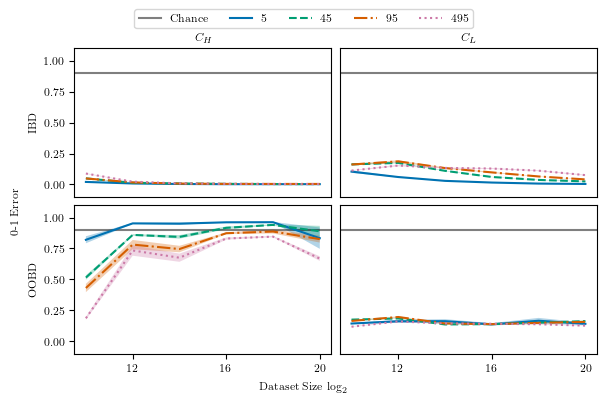

In [12]:
eval_names = [
    "eval-default-high_prob",
    "eval-default-low_prob",
    "eval-default-high_prob-flip_label",
    "eval-default-low_prob-flip_label",
]

num_rows = 2
num_cols = 2

dataset_scale = np.log2
num_seeds = 5

map_ls = {
    5: "-",
    45: "--",
    95: "-.",
    495: ":",
}

fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

model_type = "alpha"
for eval_i, eval_name in enumerate(eval_names):
    ax = axes[int(eval_i >= 2), eval_i % 2]
    # ax = axes[eval_i]
    ax.axhline(chance_error, label="Chance" if eval_i == 0 else "", c="black", linestyle="-", alpha=0.5)
    for num_low_prob_classes in num_low_prob_classess:
        losses_mean = []
        losses_std = []

        for dataset_size in dataset_sizes:
            data = 1 - (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                & (stats["stats_key"] == "accuracy")
                & (stats["eval_name"] == eval_name)
                & (stats["dataset_size"] == f"{dataset_size}")
                & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
            ]["stats"].to_list()))
            best_idx = best_idxes[(
                model_type, p_relevant_context, num_low_prob_classes, dataset_size
            )]
            sample = data[np.arange(num_seeds), best_idx]
            curr_mean = np.mean(sample)
            curr_std = np.std(sample)
            
            losses_mean.append(curr_mean)
            losses_std.append(curr_std)

        losses_mean = np.array(losses_mean)
        losses_std = np.array(losses_std) / np.sqrt(num_seeds)

        ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=num_low_prob_classes if eval_i == 0 else "", linestyle=map_ls[num_low_prob_classes])
        ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

    ax.set_ylim(-0.1, 1.1)
    loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    if eval_i % 2 == 0:
        ax.set_ylabel("IBD" if eval_i == 0 else "OOBD", fontsize="8",)

    if eval_i % 2 != 0:
        ax.set_yticks([])

    if eval_i < 2:
        ax.set_title("$C_H$" if eval_i == 0 else "$C_L$", fontsize="8",)
        ax.set_xticks([])


# fig.suptitle("$\\sigma$ = {}".format(num_low_prob_classes))
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format("$\\log_2$"), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=5,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# plt.savefig("{}-noisy_inputs-icl_analysis.pdf".format(variant_name), dpi=600, format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
assert 0

In [ ]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob": "Irrel. Cont., $C_L$",
    "eval-relevant_context-high_prob-flip_label": "Rel. Cont., $C_H$",
    "eval-relevant_context-low_prob-flip_label": "Rel. Cont., $C_L$",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Cont., $C_H$",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Cont., $C_L$",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "eval-default-none": "In-base Dist.",
    "eval-default-none-flip_label": "Out-of-base Dist.",
}

# eval_namess = [
#     [
#         "eval-relevant_context-high_prob",
#         "eval-relevant_context-low_prob",
#         "eval-irrelevant_context-high_prob",
#         "eval-irrelevant_context-low_prob",
#     ],
#     [
#         "eval-relevant_context-high_prob-flip_label",
#         "eval-relevant_context-low_prob-flip_label",
#         "eval-irrelevant_context-high_prob-flip_label",
#         "eval-irrelevant_context-low_prob-flip_label",
#     ],
# ]


eval_namess = [
    [
        "eval-irrelevant_context-none",
        "eval-relevant_context-low_prob-flip_label",
    ],
]

num_rows = 2
num_cols = 4
# fig, axes = plt.subplots(
#     num_rows,
#     num_cols,
#     figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
#     # figsize=(10, 5),
#     layout="constrained",
# )

dataset_size = dataset_sizes[-1]
print(dataset_size)
plot_res = dict()
for row_i, eval_names in enumerate(eval_namess):
    for col_i, eval_name in enumerate(eval_names):

        plot_res.setdefault(eval_name, dict())
        # ax = axes[row_i, col_i]

        for model_type in model_types:
            plot_res[eval_name].setdefault(p_relevant_context, np.empty((len(num_low_prob_classess), len(dataset_sizes))))
            losses_mean = []
            losses_std = []
            for low_prob_i, num_low_prob_classes in enumerate(num_low_prob_classess):
                for dataset_i, dataset_size in enumerate(dataset_sizes):
                    data = 1 - (np.array(stats[
                        (stats["p_relevant_context"] == f"{p_relevant_context}")
                        & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                        & (stats["stats_key"] == "accuracy")
                        & (stats["eval_name"] == eval_name)
                        & (stats["dataset_size"] == f"{dataset_size}")
                        & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                    ]["stats"].to_list()))
                    best_idx = best_idxes[(
                        model_type, p_relevant_context, num_low_prob_classes, dataset_size
                    )]
                    sample = data[np.arange(5), best_idx]
                    curr_mean = np.mean(sample)
                    curr_std = np.std(sample)
                    
                    losses_mean.append(curr_mean)
                    losses_std.append(curr_std)
                    plot_res[eval_name][p_relevant_context][low_prob_i, dataset_i] = curr_mean

            # losses_mean = np.array(losses_mean)
            # losses_std = np.array(losses_std) / np.sqrt(5)

            # ax.plot(np.log2(num_low_prob_classess), losses_mean, label=map_label[model_type] if row_i == 0 and col_i == 0 else "", marker="x")
            # ax.fill_between(np.log2(num_low_prob_classess), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        # ax.set_title(map_eval[eval_name], fontsize="8")
        # ax.set_ylim(-0.1, 1.1)

        # if col_i == 0:
        #     ax.set_ylabel("In-base Dist." if row_i == 0 else "Out-of-base Dist.", fontsize="8")

# fig.suptitle("Input Noise")
# fig.supylabel("0-1 Error", fontsize="8")
# fig.supxlabel("$C_L$ (in $\\log_2$)", fontsize="8")
# fig.legend(
#     bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
#     loc="lower center",
#     ncols=4,
#     borderaxespad=0.0,
#     frameon=True,
#     fontsize="8", 
# )
# plt.savefig("num_low_prob_classes-c_l-2.pdf", dpi=600, format="pdf", bbox_inches="tight")


In [ ]:
plot_res

In [ ]:
map_eval = {
    "eval-relevant_context-low_prob-flip_label": "IC 0-1 Error",
    "eval-irrelevant_context-none": "IW 0-1 Error",
}

fig, axes = plt.subplots(2, 3, figsize=(8, 3), layout="compressed")
for col_i, p_relevant_context in enumerate([0.0, 0.9, 1.0]):
    for eval_i, eval_name in enumerate(plot_res):
        ax = axes[eval_i, col_i]
        plot_res_data = plot_res[eval_name][p_relevant_context]
        im = ax.imshow(plot_res_data, vmin=0, vmax=1)

        ax.set_xticks(np.arange(len(dataset_sizes)), labels=["$2^{{{}}}$".format(np.log2(dataset_size).astype(int)) for dataset_size in dataset_sizes])
        ax.set_yticks(np.arange(len(num_low_prob_classess)), labels=num_low_prob_classess)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')

        if col_i == 0:
            axes[eval_i, col_i].set_ylabel(map_eval[eval_name])
    axes[0, col_i].set_title(map_label[model_type])
fig.colorbar(im, ax=axes.ravel().tolist())
fig.supylabel("$\\sigma$")
fig.supxlabel("$N$")
plt.savefig("num_low_freq-heatmap.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
dataset_sizes

In [ ]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]


num_low_prob_classes = 495
dataset_size = 1024 # [1024, 4096, 16384, 65536, 262144, 1048576]
checkpoint_interval = 5000

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=False),
    layout="constrained",
)
for row_i, eval_names in enumerate(eval_namess):
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[row_i, eval_i]
        for model_type in model_types:
            data = 1 - (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                & (stats["stats_key"] == "accuracy")
                & (stats["eval_name"] == eval_name)
                & (stats["dataset_size"] == f"{dataset_size}")
                & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
            ]["stats"].to_list()))

            losses_mean = np.mean(data, axis=0)
            losses_std = np.std(data, axis=0) / np.sqrt(5)

            ax.plot(range(len(losses_mean)), losses_mean, label=map_label[model_type] if eval_i == 0 and row_i == 0 else "", alpha=1.0 if model_type == "transformer" else 0.5)
            ax.fill_between(range(len(losses_mean)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.set_title(map_eval[eval_name], fontsize="8")
        ax.axhline(1 - 1/(num_low_prob_classes + 5), label="Chance" if eval_i == 0 and row_i == 0 else "", c="red", linestyle="--", alpha=0.5)
        ax.set_ylim(-0.1, 1.1)

        if eval_i == 0:
            ax.set_ylabel("In-base Dist." if row_i == 0 else "Out-of-base Dist.", fontsize="8")

fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("Number of Gradient Steps ($\\times {}$)".format(checkpoint_interval), fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
# plt.show()
plt.savefig("num_low_prob_classes-num_updates.pdf", dpi=600, format="pdf", bbox_inches="tight")

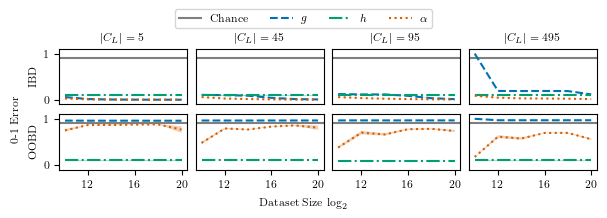

In [14]:
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "eval-default-none": "IBD",
    "eval-default-none-flip_label": "OOBD",
}

eval_names = [
    "eval-default-none",
    "eval-default-none-flip_label",
]

map_ls = {
    "iw": "--",
    "ic": "-.",
    "alpha": ":",
}
if variant_name.startswith("synthetic"):
    base = 4.0
else:
    base = 1.0

num_rows = 2
num_cols = len(num_low_prob_classess)
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)
p_relevant_context = 0.9
for col_i, num_low_prob_classes in enumerate(num_low_prob_classess):
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[eval_i, col_i]
        # ax = axes[eval_i]
        ax.axhline(chance_error, label="Chance" if eval_i == 0 and col_i == 0 else "", c="black", linestyle="-", alpha=0.5)
        for model_type in model_types:
            losses_mean = []
            losses_std = []

            for dataset_size in dataset_sizes:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["num_low_prob_classes"] == f"{num_low_prob_classes}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                    & (stats["dirname"] == f"synthetic-{model_type}-num_low_freq")
                ]["stats"].to_list()))
                best_idx = best_idxes[(
                    model_type, p_relevant_context, num_low_prob_classes, dataset_size
                )]
                sample = data[np.arange(num_seeds), best_idx]
                curr_mean = np.mean(sample)
                curr_std = np.std(sample)
                
                losses_mean.append(curr_mean)
                losses_std.append(curr_std)

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(num_seeds)

            ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=map_label[model_type] if eval_i == 0 and col_i == 0 else "", linestyle=map_ls[model_type])
            ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.set_ylim(-0.1, 1.1)
        loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)

        if col_i == 0:
            ax.set_ylabel(map_eval[eval_name], fontsize="8")

        if col_i > 0:
            ax.set_yticks([])

        if eval_i == 0:
            ax.set_xticks([])
    
    axes[0, col_i].set_title(f"$|C_L| = {num_low_prob_classes}$", fontsize="8")

# fig.suptitle("Input Noise")
fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("Dataset Size {}".format("$\\log_2$"), fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
# plt.show()
plt.savefig("{}-num_low_freq.pdf".format(variant_name), dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
variant_name